Load Dataset using Pandas

In [1]:
import pandas as pd

In [2]:
path="/content/drive/MyDrive/dataset/spam.csv"
df = pd.read_csv(path,encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


keep only useful columns and rename them

In [3]:
df = df[['v1','v2']]
df.columns = ['label', 'message']

Clean dataset

In [4]:
df = df[['label','message']].dropna()

In [5]:
df['label']=df['label'].map({'spam':1,'ham':0})

Basic Text Preprocessing & Tokenization

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [9]:
df['clean_message'] = df['message'].apply(clean_text)

In [10]:
df=df.drop('message',axis=1)
df.head()

,label,clean_message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


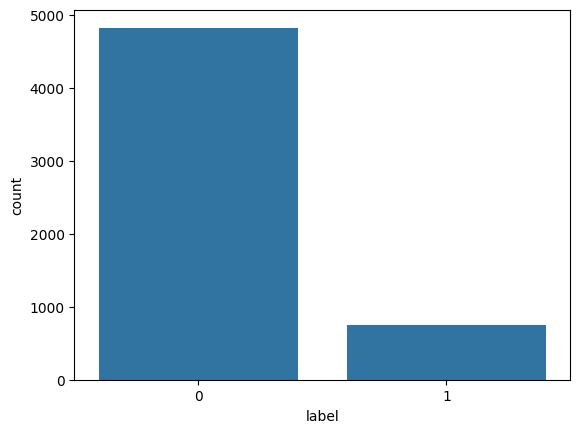

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.show()

Split into Train/Test Data

In [12]:
from sklearn.model_selection import train_test_split
X = df['clean_message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Convert Text to Numbers (TF-IDF)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.95)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Train the Model

In [15]:
#Multinomial NB
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [16]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Evaluate the Model

In [17]:
from sklearn.metrics import accuracy_score, classification_report

for model in [model_nb,model_lr]:
    pred = model.predict(X_test_tfidf)
    print(type(model).__name__)
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

MultinomialNB
Accuracy: 0.9650224215246637
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115

LogisticRegression
Accuracy: 0.9739910313901345
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       966
           1       0.89      0.91      0.90       149

    accuracy                           0.97      1115
   macro avg       0.94      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Test on new messages

In [ ]:
msg = ["Congratulations! You’ve won a free iPhone. Click to claim now!"]
msg_clean = [clean_text(m) for m in msg]
msg_vec = vectorizer.transform(msg_clean)
print(model.predict(msg_vec))

['spam']
